# How to Process, Analyze and Visualize Data (I)
This is a course provided by MIT Open Course Ware.
This notebook solves Lab 1 (Exercises 1 to 4), using Python 3, which simply consists of downloading the US Election data from 2008 (the link is found on the course website), and creates several plots to understand the donations for Obama and McCain. The code is quite similar to the one that can be found on the course website, with little variations here and there.

Read the file (if a comma is added to the first line of the file, as one way to be able to read the .csv file in R, it creates an empty field at the end).

In [2]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
print(reader.fieldnames)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


We extract the data we care about to be able to investigate the contributions per candidate, and per date. 
For this, we thus need the name of the candidate, the date of the donation, and the amount. We show how to retrieve the data.

In [5]:
for index, row in enumerate(reader):
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = row['contb_receipt_amt']
    if index < 10:
        print(','.join([name, datestr, amount]))

Cox, John H,01-MAR-07,25
Cox, John H,25-JAN-07,25
Cox, John H,17-MAY-07,50
Cox, John H,18-JAN-07,10
Cox, John H,18-JAN-07,25
Cox, John H,11-JAN-07,25
Cox, John H,12-JAN-07,20
Cox, John H,11-JAN-07,5
Cox, John H,11-JAN-07,10
Cox, John H,10-JAN-07,10


For experiments, it is best to use sampled data, so that computations are faster. We write in a file a sample of the original data file.

In [4]:
fw = open('donations_samples.csv','w') 
with open('donations.csv', 'r') as fr: 
    i = 0
    for line in fr:
        if i % 1000 == 0:
            fw.write(line)
        i +=1
fw.close()

In [1]:
import csv
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
print(reader_sampled.fieldnames)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


We write a function that will collect the amount of donations per date, for a given candidate.

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime
import matplotlib

def donationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    #empty dictionary to store the donations for the chosen candidate, defaultdict has the feature that when we try to
    #access an item whose key is not found, the item is added rather than giving a keyerror, the defaut item is of the 
    #type given in (), e.g. defaultdict(int) will use int() and return the item 0
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name:
            canddonations[date] += amount
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    return(list(zip(*sorted_by_date)))
    

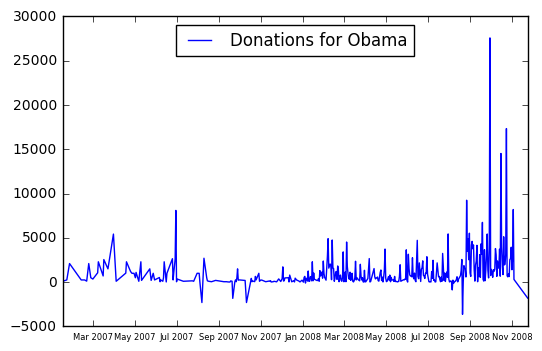

In [5]:
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
xos,yos = donationsDate(reader_sampled,'Obama')
plt.plot(xos, yos, label='Donations for Obama')
plt.legend(loc='upper center', ncol = 4)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

It seems to be working fine, let us try with the whole data.

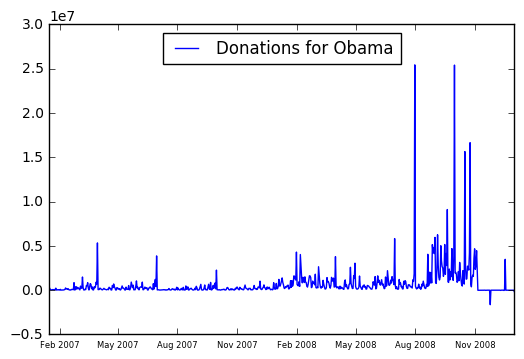

In [6]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
xo,yo = donationsDate(reader,'Obama')
plt.plot(xo, yo, label='Donations for Obama')
plt.legend(loc='upper center', ncol = 4)
plt.show()

Let us try with Mc Cain.

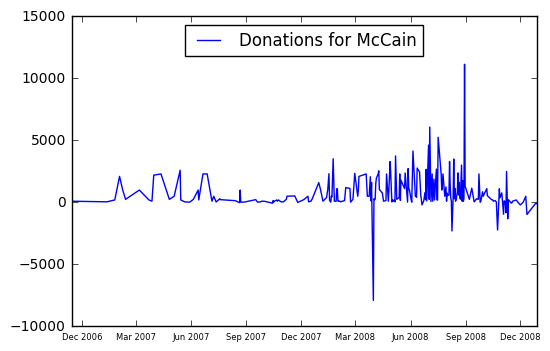

In [7]:
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
xms,yms = donationsDate(reader_sampled,'McCain')
plt.plot(xms, yms, label='Donations for McCain')
plt.legend(loc='upper center', ncol = 4)
#adjust x label's size
matplotlib.rc('xtick', labelsize=10)
plt.show()

We now try with Mc Cain and the whole data.

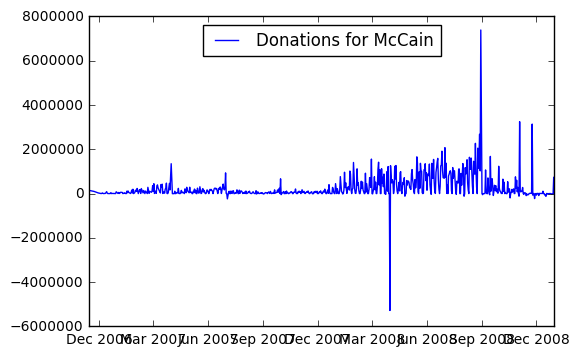

In [16]:
reader = csv.DictReader(open('donations.csv', 'r'))
xm,ym = donationsDate(reader,'McCain')
plt.plot(xm, ym, label='Donations for McCain')
plt.legend(loc='upper center', ncol = 4)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

## Exercise 1
We compare Donations for Obama and Mc Cain. This corresponds to Exercise 1, plot Obama vs McCain as a function of time. We observe strange peaks below zero, strange since we are summing donations, so we should not be getting negative amounts.

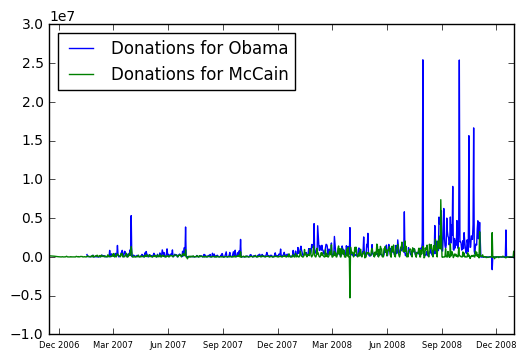

In [17]:
plt.plot(xo, yo, label='Donations for Obama')
plt.plot(xm, ym, label='Donations for McCain')
plt.legend(loc='upper left', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

Next we plot cumulative donations.

In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime
import matplotlib

def cumdonationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    #empty dictionary to store the donations for the chosen candidate, defaultdict has the feature that when we try to
    #access an item whose key is not found, the item is added rather than giving a keyerror, the defaut item is of the 
    #type given in (), e.g. defaultdict(int) will use int() and return the item 0
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name:
            canddonations[date] += amount
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    xs,ys = list(zip(*sorted_by_date))
    #cumulative donations
    ycum = []
    ycum.append(ys[0])
    for i in range(1,len(ys)):
        ycum.append(ycum[i-1]+ys[i]) 
    return(xs,ycum)
    

We try the plot on the sample data for Obama.

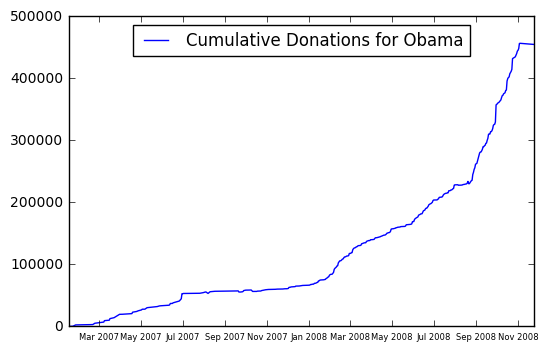

In [19]:
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
xosc,yosc = cumdonationsDate(reader_sampled,'Obama')
plt.plot(xosc,yosc, label='Cumulative Donations for Obama')
plt.legend(loc='upper center', ncol = 4)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

So next we redo the plot for the whole data for Obama, as well as for McCain, so that we can then compare them.

In [25]:
reader = csv.DictReader(open('donations.csv', 'r'))
xoc,yoc = cumdonationsDate(reader,'Obama')

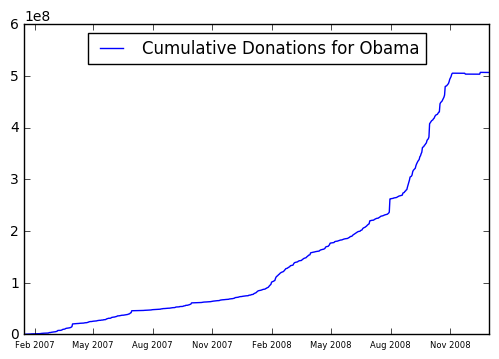

In [20]:
plt.plot(xoc,yoc, label='Cumulative Donations for Obama')
plt.legend(loc='upper center', ncol = 4)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

In [5]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
xmc,ymc = cumdonationsDate(reader,'McCain')

## Exercise 2
We plot the cumulative donations of McCain vs that of Obama.

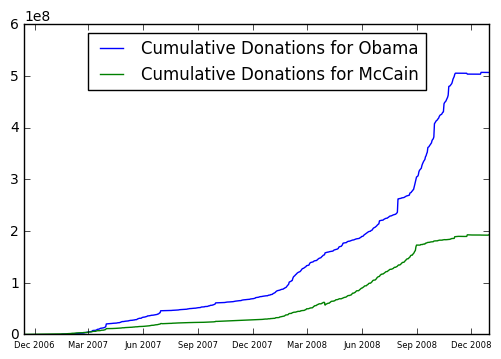

In [23]:
plt.plot(xoc,yoc, label='Cumulative Donations for Obama')
plt.plot(xmc,ymc, label='Cumulative Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

We next look at these negative donations. To do that, we extract data where the amount is negative. 

In [37]:
def Negdonations(rdr):
    #rdr is the csv file read (reader or reader_sampled)
    negdonations = []
    for row in rdr:
        amount = float(row['contb_receipt_amt'])
        #create a list where each entry is a row (a dictionary)
        if amount < 0: 
            negdonations.append(row)
    return(negdonations)

In [14]:
import csv
reader = csv.DictReader(open('donations_samples.csv', 'r'))
neg_reader = Negdonations(reader)
print(reader.fieldnames)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


We now have a list of rows corresponding to negative negations, and we just recalled what are the headers. We are not interested in: the ids, the names, the place, the jobs, or the donation itself (amount or date), at least for now. We check next what is the receipt description.

In [27]:
rec_desc = set()
#we extract the receipt description, using a set removes the duplicates
for row in neg_reader:
    rec_desc.add(row['receipt_desc'])
rec_desc

{'',
 'REATTRIBUTED BELOW',
 'REATTRIBUTION - NET AMOUNT',
 'REATTRIBUTION FROM',
 'REATTRIBUTION TO SPOUSE',
 'REATTRIBUTION/REDESIGNATION REQUESTED',
 'REDESIGNATION FROM',
 'REDESIGNATION TO GELAC',
 'REDESIGNATION TO GENERAL',
 'REFUND TO BE ISSUED REDESIGNATION TO GENERAL',
 'Refund'}

Apparently reattribution to spouse means that a person will donate money, which will be reattributed (refunded) to the 
spouse. Then the spouse will turn around and donate the money to the candidate. This is supposed to be a fishy behaviour, so let us see only the cumulative negative donations per candidate.

In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime
import matplotlib

def cumnegdonationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name and amount < 0:
            canddonations[date] += amount
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    xs,ys = list(zip(*sorted_by_date))
    #cumulative donations
    ycum = []
    ycum.append(ys[0])
    for i in range(1,len(ys)):
        ycum.append(ycum[i-1]+ys[i]) 
    return(xs,ycum)
    

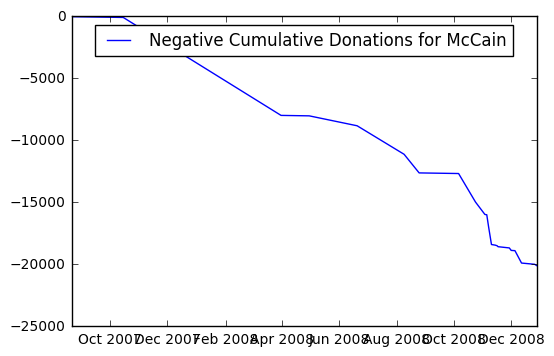

In [6]:
import csv
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
xmcsn,ymcsn = cumnegdonationsDate(reader_sampled,'McCain')
plt.plot(xmcsn,ymcsn, label='Negative Cumulative Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
plt.show()

Ok this seems to work, let us do it with the whole data.

In [7]:
reader = csv.DictReader(open('donations.csv', 'r'))
xmcn,ymcn = cumnegdonationsDate(reader,'McCain')

In [8]:
reader = csv.DictReader(open('donations.csv', 'r'))
xocn,yocn = cumnegdonationsDate(reader,'Obama')

## Exercise 3
We plot the cumulative negative donations for both candidates. This is not quite what Exercise 3 was about, we needed only the negative donations due to reattribution to spouse. This will be done below.

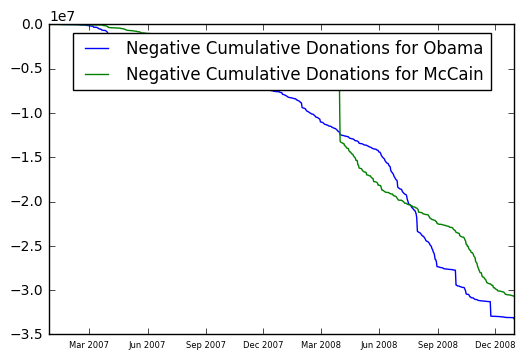

In [10]:
plt.plot(xocn,yocn, label='Negative Cumulative Donations for Obama')
plt.plot(xmcn,ymcn, label='Negative Cumulative Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

Finally we look at the ratio of the cumulative negative donations with the cumulative total donations. Of course it would be nice to not have to recompute things, but the way donations are computed so far, the negative and the total ones give outputs of different lengths (since there is not a negative donation at every date where there is a donation). We thus change a bit the function so that there is data for every date.

In [11]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime
import matplotlib

def cumnegdonationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name:
            if  amount < 0:
                canddonations[date] += amount
            else: 
                canddonations[date] += 0 
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    xs,ys = list(zip(*sorted_by_date))
    #cumulative donations
    ycum = []
    ycum.append(ys[0])
    for i in range(1,len(ys)):
        ycum.append(ycum[i-1]+ys[i]) 
    return(xs,ycum)   

In [12]:
reader = csv.DictReader(open('donations.csv', 'r'))
xmcn,ymcn = cumnegdonationsDate(reader,'McCain')

In [30]:
reader = csv.DictReader(open('donations.csv', 'r'))
xocn,yocn = cumnegdonationsDate(reader,'Obama')

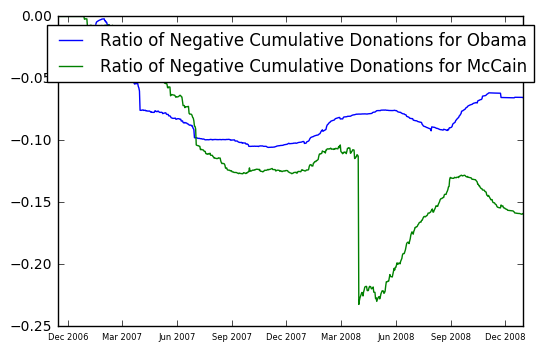

In [31]:
yrm = [ a/b for a, b in zip(ymcn, ymc)]
yro = [ a/b for a, b in zip(yocn, yoc)]
plt.plot(xocn,yro, label='Ratio of Negative Cumulative Donations for Obama')
plt.plot(xmcn,yrm, label='Ratio of Negative Cumulative Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

Suppose that at a given date, we have a ratio $n/d$. Now we look at the next date. If we have only positive donations, then the numerator does not change, while the denominator increases. This explains why the curves can go up. If on the contrary, we got only negative donations, then the numerator which is negative will become a larger negative number, while the denominator, a positive number, will decrease. This explains why the curves can go down (and then we have also the scenarios where we have a mixture of positive and negative donations). Thus the fall in McCain's curve suggests that the negative donations in absolute value were larger than the positive ones at this point of time.

Again, the above is the ratio between positive and negative donations. We do it only for negative donations coming from reattribution to spouse below. If we look for 'reattribution to spouse' in the receipt description, we find none for Obama. We thus first look at what appears in the receipt description for Obama.

In [41]:
rec_desc = set()
#we extract the receipt description, using a set removes the duplicates
reader = csv.DictReader(open('donations.csv', 'r'))
neg_reader = Negdonations(reader)
for row in neg_reader:
    name = row['cand_nm']
    desc = row['receipt_desc']
    amount = row['contb_receipt_amt']
    if 'Obama' in name:
        rec_desc.add(row['receipt_desc'])
rec_desc

{'',
 'REAT/REDES - SUBTRACTION',
 'REATTRIBUTION - NET AMOUNT',
 'REATTRIBUTION FROM',
 'REATTRIBUTION/REDESIGNATION REQUESTED',
 'REDESIGNATION FROM',
 'Refund'}

So we focus on the reattributions.

In [42]:
from collections import defaultdict
import matplotlib.pyplot as plt
import datetime
import matplotlib

def cumspousedonationsDate(rdr,cand_nm):
    #rdr is the csv file read (reader or reader_sampled), cand_nm is the name of the candidate we care about
    canddonations = defaultdict(int)
    for row in rdr:
        name = row['cand_nm']
        datestr = row['contb_receipt_dt']
        amount = float(row['contb_receipt_amt'])
        desc = row['receipt_desc']
        #interprets the time data as a date
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        if cand_nm in name:
            if  amount < 0 and 'REATTRIBUTION' in desc:
                canddonations[date] += amount
            else: 
                canddonations[date] += 0 
    # we need to sort dates chronologically 
    sorted_by_date = sorted(canddonations.items())
    #a typical entry of sorted_by_date is (datetime.datetime(2007, 1, 16, 0, 0), 100.0),* unpacks and zip gathers dates
    #together on the one hand, and sums together on the other hand
    xs,ys = list(zip(*sorted_by_date))
    #cumulative donations
    ycum = []
    ycum.append(ys[0])
    for i in range(1,len(ys)):
        ycum.append(ycum[i-1]+ys[i]) 
    return(xs,ycum)   

In [45]:
reader = csv.DictReader(open('donations.csv', 'r'))
xmcs,ymcs = cumspousedonationsDate(reader,'McCain')

In [43]:
reader = csv.DictReader(open('donations.csv', 'r'))
xocs,yocs = cumspousedonationsDate(reader,'Obama')

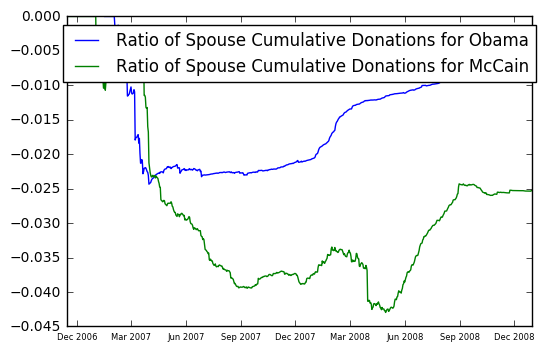

In [47]:
ysm = [ a/b for a, b in zip(ymcs, ymc)]
yso = [ a/b for a, b in zip(yocs, yoc)]
plt.plot(xocs,yso, label='Ratio of Spouse Cumulative Donations for Obama')
plt.plot(xmcs,ysm, label='Ratio of Spouse Cumulative Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()